# <font color="darkblue"> Prática 01: Classificação binária com Redes Neurais </font>

**Objetivos:**


*   Utilizar a API Keras para classificação binária com redes neurais.

**Descrição:**

Com base em informações fornecidadas de 303 pessoas, as quais incluem idade, pressão arterial, nível de colesterol, frequência cardíaca, entre outros, crie uma rede neural para prever as chances de indivíduo ter um um infarto. Implemente as células cujos labels indicadores estão em vermelho.  

# <font color="darkblue"> Solução </font>

### Bibliotecas

In [25]:
# !pip install keras
# !pip install tensorflow
# !pip install sklearn

In [26]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
Pandas: 1.4.1
Numpy: 1.22.3
Sklearn: 1.1.2
Matplotlib: 3.5.2
Keras: 2.11.0


### Leitura das instâncias

In [27]:
BATCH_SIZE = 16
RANDOM_STATE = 2

data = pd.read_csv("heart.csv")

X = np.array(data.drop(['output'], axis=1))
y = np.array(data['output'])

### Explorando os dados

In [28]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

print(f"Shape: {data.shape}")
data.head()

Shape: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


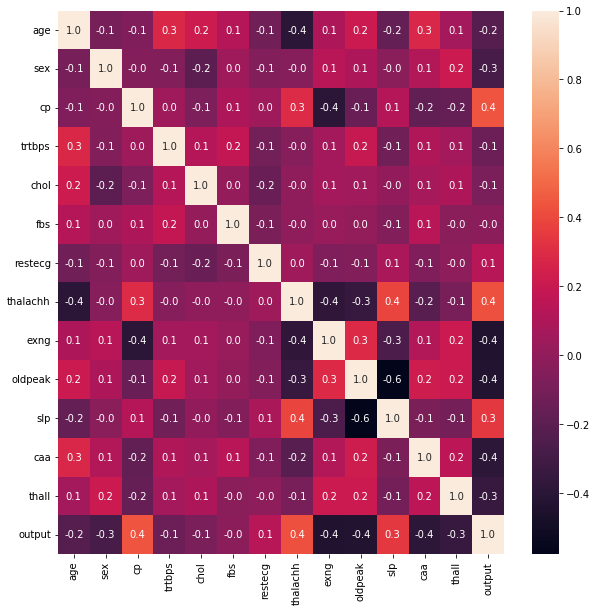

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

### Criando a rede neural

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(500, input_dim=13, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

#Parametros do treinamento é (n features + 1 bias) * n neurons + n neurons(saida) + 1 bias



# regra de ouro: n_params * 10 = n_samples para garantir generalização

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               7000      
                                                                 
 dense_13 (Dense)            (None, 1)                 501       
                                                                 
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________
None


### Treinando a rede neural

In [31]:
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE)

Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 0.8234 - accuracy: 0.5124
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7767 - accuracy: 0.4876
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7298 - accuracy: 0.5455
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7529 - accuracy: 0.4876
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7363 - accuracy: 0.5661
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5909
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7765 - accuracy: 0.5620
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7322 - accuracy: 0.5826
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.5207
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5537
Epoch 11/50
16/16 [

### Performance do modelo

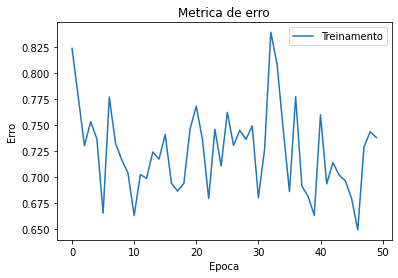

16/16 [==============================] - 0s 999us/step
--> Acuracia (treino): 0.5620
2/2 [==============================] - 0s 2ms/step
--> Acuracia (teste): 0.4754

E_out - E_in = 0.0866


In [32]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(model.predict(X_train, batch_size=BATCH_SIZE))
acc_train = accuracy_score(y_train, pred)
print(f'--> Acuracia (treino): {acc_train:.4f}')

pred = np.round(model.predict(X_test))
acc_test = accuracy_score(y_test, pred)
print(f'--> Acuracia (teste): {acc_test:.4f}')

print(f'\nE_out - E_in = {acc_train - acc_test:.4f}') # E_out - E_in é a diferença entre os erros

<span style="color:red; font-size: 17px; font-weight: bold;">Crie uma rede neural usando a teoria da Dimensão VC para determinar o número máximo de neurônios $n$ na camada escondida:</span>

</br></br>

<span style="color:red; font-size: 20px">
$n \le \lfloor \frac{\lvert DS \rvert - 10}{10\times (d+2)} \rfloor  $ 
</span>

In [33]:
# n <= (ds -10)/10*(d-2)

RegraOuroNeuronios = (data.shape[0] - 10)/10*(data.shape[1]-2)

In [34]:
RegraOuroNeuronios

351.6

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection


# Divida os dados em treino e teste


# Crie a arquitetura da rede neural


# Configure a rede a partir de informações da dimensão VC e da regra de ouro


# Gradiente Descendente
sgd = optimizers.SGD(learning_rate=0.01)  

# Compile o modelo

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               7000      
                                                                 
 dense_13 (Dense)            (None, 1)                 501       
                                                                 
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________
None


### Usando validação para verificar se há overfitting

In [36]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
7/7 [==============================] - 0s 26ms/step - loss: 0.7478 - accuracy: 0.5544 - val_loss: 1.6825 - val_accuracy: 0.4490
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.8582 - accuracy: 0.5233 - val_loss: 1.4813 - val_accuracy: 0.4490
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8139 - accuracy: 0.6114 - val_loss: 1.3970 - val_accuracy: 0.5510
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7805 - accuracy: 0.6010 - val_loss: 1.6352 - val_accuracy: 0.4490
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8020 - accuracy: 0.5803 - val_loss: 1.1909 - val_accuracy: 0.5510
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7693 - accuracy: 0.5648 - val_loss: 1.5127 - val_accuracy: 0.4490
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8093 - accuracy: 0.5751 - val_loss: 1.0303 - val_accuracy: 0.5510
Epoch 8/100
7/7 [=========

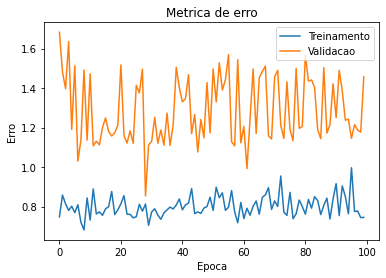

7/7 [==============================] - 0s 997us/step
--> Acuracia (treino): 0.4352
2/2 [==============================] - 0s 2ms/step


ValueError: Found input variables with inconsistent numbers of samples: [49, 61]

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_val, pred):.4f}')

print(f'\nE_out - E_in = {accuracy_score(y_train, pred) - accuracy_score(y_val, pred):.4f}')

<span style="color:red; font-size: 18px; font-weight: bold;">Crie uma rede neural para gerar overfitting</span>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

# Normalizacao de dados
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
# model.add(Dense(500, input_dim=13, kernel_initializer='normal', activation='tanh'))
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               2800      
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 43,201
Trainable params: 43,201
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

# history = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE)



In [ ]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
7/7 [==============================] - 1s 43ms/step - loss: 0.6881 - accuracy: 0.6062 - val_loss: 0.6681 - val_accuracy: 0.6939
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6647 - accuracy: 0.7098 - val_loss: 0.6397 - val_accuracy: 0.6735
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6384 - accuracy: 0.7202 - val_loss: 0.5909 - val_accuracy: 0.8571
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6042 - accuracy: 0.7720 - val_loss: 0.5374 - val_accuracy: 0.8776
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5704 - accuracy: 0.7876 - val_loss: 0.4837 - val_accuracy: 0.8776
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5423 - accuracy: 0.7927 - val_loss: 0.4530 - val_accuracy: 0.8776
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5046 - accuracy: 0.7979 - val_loss: 0.4138 - val_accuracy: 0.9184
Epoch 8/100
7/7 [=======

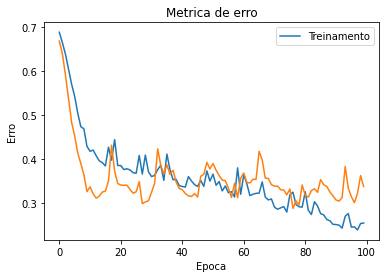

13/13 [==============================] - 0s 2ms/step
--> Acuracia (treino): 0.9016
2/2 [==============================] - 0s 3ms/step
--> Acuracia (teste): 0.8367

E_out - E_in = 0.0648


In [24]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

pred = np.round(model.predict(X_train, batch_size=BATCH_SIZE))
acc_train = accuracy_score(y_train, pred)
print(f'--> Acuracia (treino): {acc_train:.4f}')

pred = np.round(model.predict(X_val))
acc_test = accuracy_score(y_val, pred)
print(f'--> Acuracia (teste): {acc_test:.4f}')

print(f'\nE_out - E_in = {acc_train - acc_test:.4f}') # E_out - E_in é a diferença entre os erros

### Tratando o overfitting

In [19]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

# Criando a arquitetura da rede neural
model = Sequential()

# Após o teste anterior, testem a rede neural abaixo, treinando-a com o Early Stopping
model.add(Dense(260, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(260, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

# Treinamento SEM Early Stopping
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=32)

# Treinamento COM Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=32, callbacks=[es])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 260)               3640      
                                                                 
 dense_6 (Dense)             (None, 260)               67860     
                                                                 
 dense_7 (Dense)             (None, 1)                 261       
                                                                 
Total params: 71,761
Trainable params: 71,761
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
8/8 [==============================] - 1s 31ms/step - loss: 2.3044 - accuracy: 0.5702 - val_loss: 2.0661 - val_accuracy: 0.7705
Epoch 2/300
8/8 [==============================] - 0s 9ms/step - loss: 1.9213 - accuracy: 0.7355 - val_loss: 1.7319 - val_accuracy: 0.7377
Epoch 3/300
8/8 [=============

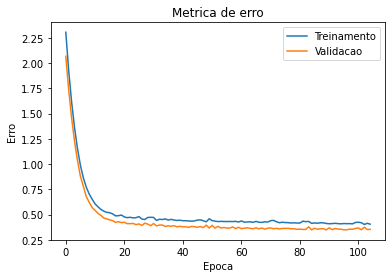

8/8 [==============================] - 0s 2ms/step
--> Acuracia (train): 0.8471
--> Acuracia (test): 0.8689


In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print(f'--> Acuracia (train): {accuracy_score(y_train, pred_train):.4f}')
print(f'--> Acuracia (test): {accuracy_score(y_test, pred):.4f}')

### Usando o K-Fold Cross Validation para validar o modelo usando todo o conjunto de treinamento

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Garante que cada fold esteja balanceado
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Inicializa a lista de armazenar os acurácias de cada fold
accuracies = []

# Executa a validação para cada fold
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Criando a arquitetura da rede neural
    model = Sequential()    
    model.add(Dense(200, input_dim=13, kernel_regularizer=regularizers.l2(0.01), kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compila o modelo
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    print(model.summary())
  
    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32)
    
    # Avalia o modelo
    _, accuracy = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    accuracies.append(accuracy)

# Calcula a acurácia média
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)